# eRNA count matrix analysis

In [ ]:
library(magrittr)
library(dplyr)
library(stringi)

In [ ]:
setwd(here::here()) # set working directory to project root
getwd()


[1] 0


In [5]:
# read count matrix
erna_exrs_matrix <- read.table("GSE126074_SNARE_seq/06_count_eRNA/erna_exrs_matrix.tsv", header = TRUE, sep = "\t", row.names = 1)


In [6]:
erna_exrs_matrix[1:10,1:10]

,AAAAACGGCCTG,AAAACACTCCTG,AAAACCGGTACC,AAAACGCCTTTC,AAAAGTGTCACG,AAAATTCGATCA,AAACATCCCAGC,AAACCATTCTTC,AAACCCATGTAC,AAACCGCCATAT
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSR10_73CRCM,0,0,0,0,0,0,0,0,0,0
ENSR10_73R2M6,0,0,0,0,0,0,0,0,0,0
ENSR10_744KHP,0,0,0,0,0,0,0,0,0,0
ENSR10_74JXL6,0,0,0,0,0,0,0,0,0,0
ENSR10_755P8K,0,0,0,0,0,0,0,0,0,0
ENSR10_75GLKG,0,0,0,0,0,0,0,0,0,0
ENSR10_75J7R5,0,0,0,0,0,0,0,0,0,0
ENSR10_75TMFL,0,0,0,0,0,0,0,0,0,0
ENSR10_765W5T,0,0,0,0,0,0,0,0,0,0


In [7]:
# remove rows that are not eRNAs
ro_remove =  c("__no_feature", "__ambiguous", "__too_low_aQual", 
"__not_aligned", "__alignment_not_unique")
erna_exrs_matrix <- erna_exrs_matrix[!rownames(erna_exrs_matrix) %in% ro_remove, ]

In [8]:
dim(erna_exrs_matrix)

[1] 42331  1047

In [9]:
# unexpressed cells count
unexpr_cells = colSums(erna_exrs_matrix==0)
paste0("unexpressed cells: ", sum(unexpr_cells==nrow(erna_exrs_matrix))," out of ", ncol(erna_exrs_matrix))
# unexpssed rows count
unexpr_rows = rowSums(erna_exrs_matrix==0)
paste0("unexpressed eRNA: ", sum(unexpr_rows==ncol(erna_exrs_matrix))," out of ", nrow(erna_exrs_matrix))



[1] "unexpressed cells: 730 out of 1047"

[1] "unexpressed eRNA: 41995 out of 42331"

In [10]:
# precent of zeros in the matrix
print(paste0(" precent of zeros: ",sum(erna_exrs_matrix == 0) / (nrow(erna_exrs_matrix) * ncol(erna_exrs_matrix))))

# number of cells with more than 0 counts
print(paste0("number of cells with more than 0 counts: ", sum(colSums(erna_exrs_matrix) > 0)))

# number of eRNAs with more than 0 counts
print(paste0("number of eRNAs with more than 0 counts: ", sum(rowSums(erna_exrs_matrix) > 0)))


[1] " precent of zeros: 0.999991358411854"
[1] "number of cells with more than 0 counts: 317"
[1] "number of eRNAs with more than 0 counts: 336"


In [11]:
# filter the matrix to only include expressed eRNAs and cells with more than 0 counts
expressed_erna_exrs_matrix <- erna_exrs_matrix[rowSums(erna_exrs_matrix) > 0,colSums(erna_exrs_matrix) > 0]

In [12]:
# show first 100 sums of cells
colSums(expressed_erna_exrs_matrix) %>% head(100)

AAACCGCCATAT AAACGAAAAGTC AAAGTGCCACAT AAATACGCCAAG AAATCGATGAAT AAATTCAGGCGG 
           1            1            2            1            1            1 
AACATCCCTGAG AACCATAGTTAG AACCCACGTGGT AACGTCCTACTA AACTAGCCAAAG AACTCAGTTATG 
           1            1            1            1            1            1 
AACTTGGGACTT AAGCCTGTTGTA AAGCTGGACGAT AAGGAGAAATGT AAGGGTGCTAAC AAGGTGTCTCCA 
           1            1            1            1            1            2 
AAGTCGATCAAC AATAAATCTATC AATCTATGTCGC AATTTGGGAGCA ACAAATAACAGT ACAGAGAGGACA 
           1            1            2            1            2            1 
ACCCGGGAACGA ACCCTGGAAACC ACCCTGGAGACG ACCGGTAGCTGA ACCGTTTCTCTC ACGCTTATGACC 
           1            2            1            1            1            2 
ACGTCATCCGTA ACGTTCCGAGAA ACTAAAGGCCTC ACTCCGTTCACT ACTGCCTATGGA ACTTACAGCGTG 
           1            1            2            1            1            1 
ACTTGACTTGGC ACTTGGTTCAAG ACTTTCTAATCA AGAGAAGGTTCC AGATGGGCCGAA AGCACCGTATTT 
           1            1            1            1            1            1 
AGCCAATACCCT AGCCCCTCACGC AGCCTTAGAACA AGCGTATACTAA AGCGTTGCGAGC AGGCTTCGTAAC 
           1            1            1            1            1            1 
AGGGCGTTGTAG AGGGTCCGAATT AGGTCGACGCGT AGGTGACCACTC AGGTGTGTGTCC AGTCGTTTTCGA 
           1            2            1            1            2            1 
AGTCTAAGGTTA AGTCTCCTACTC AGTGTTAGCTTT AGTTTTAGATTA ATAAGCGACGAA ATACAGTCGTCA 
           2            1            1            1            1            1 
ATACGACGATTC ATATCAGCCAGA ATATTTTGCTAT ATCAACTAGAAT ATCACAGGCACG ATCACGGTCCAC 
           1            1            1            1            1            1 
ATCCCCCAGGGA ATCCTCTTACAT ATCGCGTGTATC ATCGGGCAAACG ATCGTTGGGCTG ATCTCGTGGTGC 
           1            2            1            1            1            1 
ATGACTTACGCA ATGTAATTTGTC ATGTGAGGGTGG ATTGAGCAGGAT ATTGGTCAATTA ATTGTTGACTAA 
           2            1            1            1            3            1 
CAACTTGGAAAT CAAGACCGAGAA CAAGGCTGAACT CAAGTTAGGTCC CACGCCAACTCT CACTCGGATAAT 
           1            1            1            1            1            1 
CACTGAAGGACC CAGCAGTGAGAA CAGTGCCCATCT CATCTATCAAGG CATTGCGATCCT CCAACCGTAGAT 
           2            1            1            1            2            1 
CCACCGAGCAAA CCACGGAGACAA CCACTTAGAGAC CCAGATCGAAGA CCATTAGCGACA CCCAACATGGAT 
           1            1            1            1            1            2 
CCCACCTTATTT CCCACTGTGGGT CCCCCCTGGGCT CCCCTCAGAGCG 
           2            1            2            1

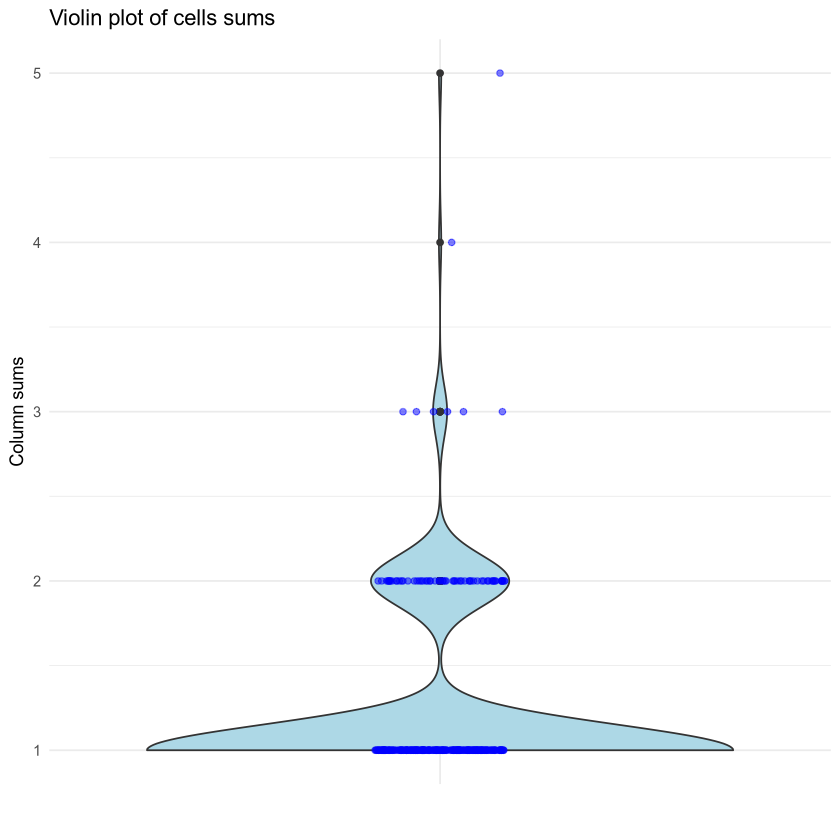

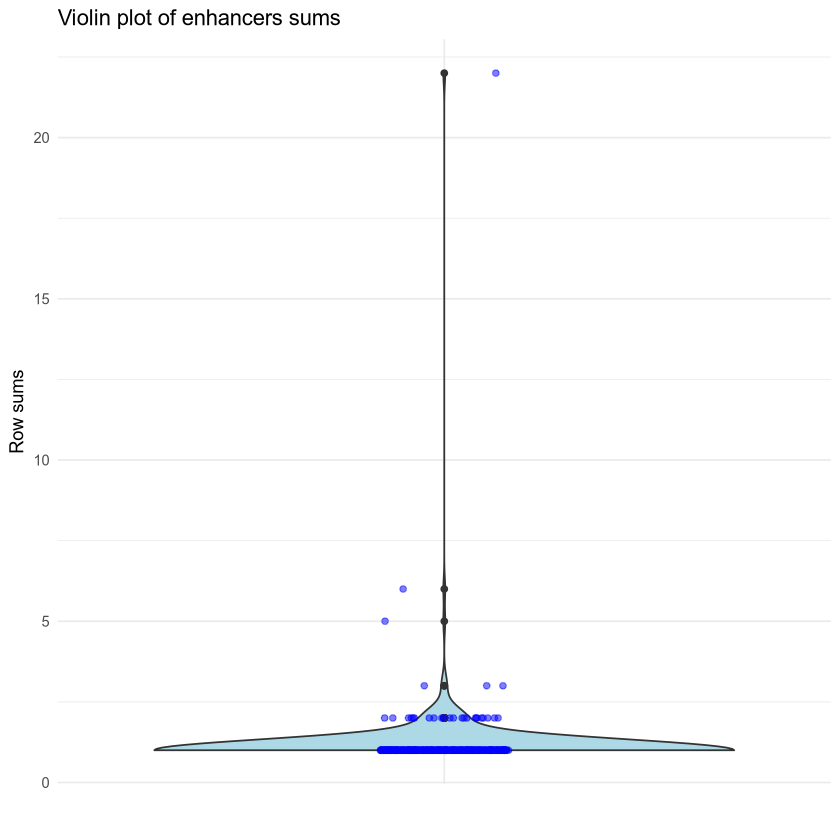

In [13]:
# violin plot of column sums with jittered points
data_cols = data.frame(sum = colSums(expressed_erna_exrs_matrix))
library(ggplot2)
p = ggplot(data_cols, aes(x = "", y = sum)) +
  geom_violin(fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "lightgreen") +
  geom_jitter(width = 0.1, alpha = 0.5, color = "blue",height = 0) +
  labs(title = "Violin plot of cells sums", x = "", y = "Column sums") +
  theme_minimal()

print(p)
# violin plot of row sums
data_rows = data.frame(sum = rowSums(expressed_erna_exrs_matrix))
p = ggplot(data_rows, aes(x = "", y = sum)) +
  geom_violin(fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "lightgreen") +
  geom_jitter(width = 0.1, alpha = 0.5, color = "blue",height = 0) +
  labs(title = "Violin plot of enhancers sums", x = "", y = "Row sums") +
  theme_minimal()
p




  Var1 Freq
1    1  250
2    2   59
3    3    6
4    4    1
5    5    1


  Var1 Freq
1    1  307
2    2   23
3    3    3
4    5    1
5    6    1
6   22    1


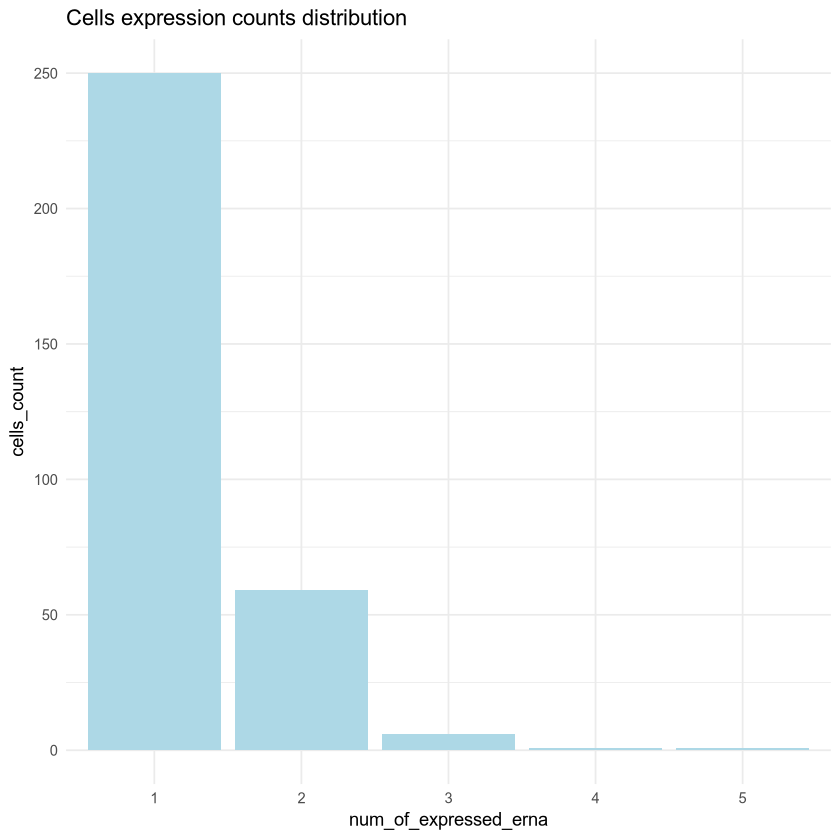

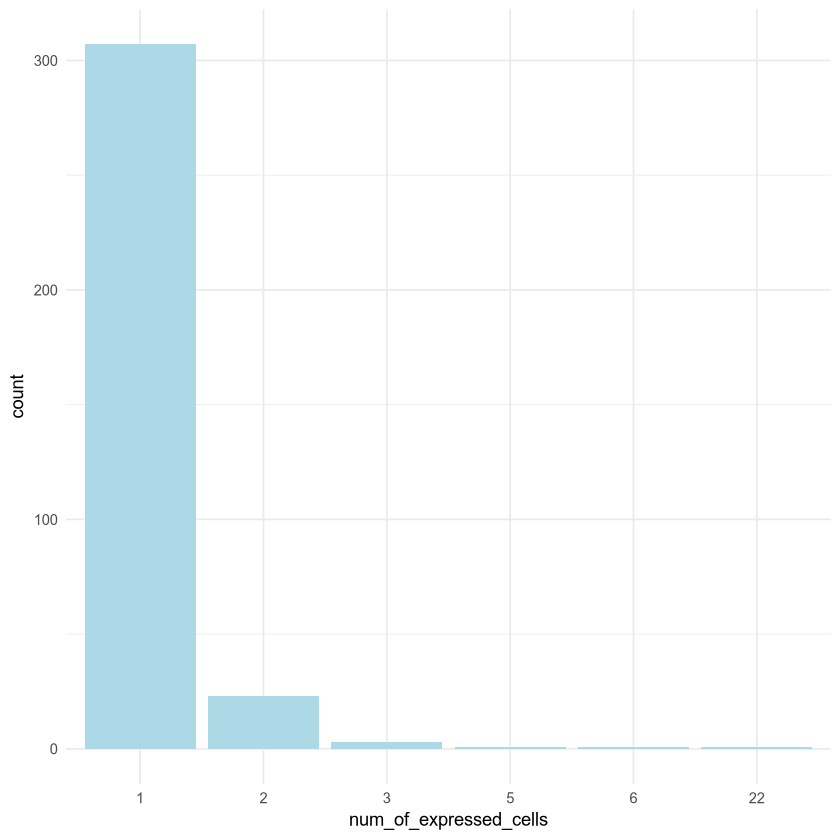

In [ ]:
#bar plot of rows distribution
table_data = as.data.frame(table(data_cols$sum))
print(table_data)
colnames(table_data) = c("num_of_expressed_erna", "cells_count")
table_data$expression = as.factor(table_data$num_of_expressed_erna)
p = ggplot(table_data, aes(x = num_of_expressed_erna, y = cells_count)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  labs(title = "Cells expression counts distribution") +
  theme_minimal()

p

# bar plot of  cells distribution
table_data = as.data.frame(table(data_rows$sum))
print(table_data)
colnames(table_data) = c("num_of_expressed_cells", "count")
table_data$expression = as.factor(table_data$num_of_expressed_cells)
p = ggplot(table_data, aes(x = num_of_expressed_cells, y = count)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  theme_minimal()
p 




In [ ]:
#complex heatmap of the matrix
library(ComplexHeatmap)
library(circlize)
row_labels = rownames(expressed_erna_exrs_matrix)
# show only every 100th label
row_labels[!((1:length(row_labels)) %% 100 == 1)] <- ""
#same for column labels
column_labels = colnames(expressed_erna_exrs_matrix)
column_labels[!((1:length(column_labels)) %% 100 == 1)] <- ""
p = Heatmap(as.matrix(expressed_erna_exrs_matrix), name = "eRNA expression", col = colorRamp2(c(0, 1, 5, 10, 20),
 c("white", "lightblue", "blue", "darkblue", "black")),row_labels = row_labels, column_labels = column_labels, cluster_rows = F, cluster_columns = F,)
p

In [ ]:
#save p  as pdf
pdf("GSE126074_SNARE_seq/08_counts_analysis//erna_exrs_heatmap.pdf", width = 10, height = 10)
print(p)
dev.off()

In [ ]:
#read GSE126074_SNARE_seq/07_regions_to_erna/associated_enhancers_with_chromatin.bed
associated_enhancers_with_chromatin <- read.table("GSE126074_SNARE_seq/07_regions_to_erna/associated_enhancers_with_chromatin.bed", header = FALSE, sep = "\t")


In [ ]:

colnames(associated_enhancers_with_chromatin) = c("chr", "start", "end", "region", "erna_chr", "erna_start", "erna_end", "erna_id", "type", "overlap_bp")
head(associated_enhancers_with_chromatin)
dim(associated_enhancers_with_chromatin)

,chr,start,end,region,erna_chr,erna_start,erna_end,erna_id,type,overlap_bp
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>
1,2,148881654,148881927,chr2:148881654-148881927,.,-1,-1,.,.,0
2,8,99495798,99496023,chr8:99495798-99496023,.,-1,-1,.,.,0
3,22,21735444,21736416,chr22:21735444-21736416,.,-1,-1,.,.,0
4,3,28241304,28242015,chr3:28241304-28242015,.,-1,-1,.,.,0
5,5,154627638,154628386,chr5:154627638-154628386,5,154627657,154628356,ENSR5_B35NJX,enhancer,699
6,15,79338695,79338894,chr15:79338695-79338894,.,-1,-1,.,.,0


[1] 136798     10

In [ ]:
all_regions_to_erna = associated_enhancers_with_chromatin %>% dplyr::filter(overlap_bp > 0) 

In [ ]:
all_regions_to_erna = all_regions_to_erna %>% select(region, erna_id) 
head(all_regions_to_erna)

,region,erna_id
,<chr>,<chr>
1,chr5:154627638-154628386,ENSR5_B35NJX
2,chr16:12646516-12646896,ENSR16_B4HQN
3,chr16:13873882-13874143,ENSR16_8F2CX
4,chr16:17497753-17497979,ENSR16_8HW33
5,chr16:17499494-17499825,ENSR16_98XJK
6,chr16:4123982-4124241,ENSR16_859DL


In [ ]:
atac_counts <- read.table("GSE126074_SNARE_seq/01_raw_data/GSE126074/GSE126074_CellLineMixture_SNAREseq_chromatin_counts.tsv", header = TRUE, sep = "\t", row.names = 1)


In [ ]:
atac_counts$region = rownames(atac_counts)
head(atac_counts)

,ACTTTCTAATCA,GAGAGAAAACCT,TACGGCTGTTAT,GACGCGTAAGTG,GAAAGGACTGCA,TGACCTGGATAA,ACTCCGTTCACT,TAGGTAGCGCGC,CTCTACCCTTCA,GCCCGTTATCTG,⋯,TTCCCCTACAAC,TGTAATCATCTG,ACATAAATTAGT,ATAGTGCTCGCC,GTTCTTCCTAGT,ATCCGTTCAACG,CCGACTAAGAAT,AAGCCTGGGGGC,CAGCTGGTGATG,region
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
chr2:148881654-148881927,1,1,3,0,0,13,1,0,0,2,⋯,0,0,0,0,0,0,4,0,2,chr2:148881654-148881927
chr8:99495798-99496023,1,1,0,0,0,8,0,1,0,0,⋯,0,1,0,0,2,3,0,1,1,chr8:99495798-99496023
chr22:21735444-21736416,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,chr22:21735444-21736416
chr3:28241304-28242015,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,chr3:28241304-28242015
chr5:154627638-154628386,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,chr5:154627638-154628386
chr15:79338695-79338894,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,chr15:79338695-79338894


In [ ]:
final_counts_df <- 
  left_join(atac_counts, all_regions_to_erna, by = "region") %>%
  filter(!is.na(erna_id))   
head(final_counts_df)



,ACTTTCTAATCA,GAGAGAAAACCT,TACGGCTGTTAT,GACGCGTAAGTG,GAAAGGACTGCA,TGACCTGGATAA,ACTCCGTTCACT,TAGGTAGCGCGC,CTCTACCCTTCA,GCCCGTTATCTG,⋯,TGTAATCATCTG,ACATAAATTAGT,ATAGTGCTCGCC,GTTCTTCCTAGT,ATCCGTTCAACG,CCGACTAAGAAT,AAGCCTGGGGGC,CAGCTGGTGATG,region,erna_id
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,chr5:154627638-154628386,ENSR5_B35NJX
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,chr16:12646516-12646896,ENSR16_B4HQN
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,chr16:13873882-13874143,ENSR16_8F2CX
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,chr16:17497753-17497979,ENSR16_8HW33
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,chr16:17499494-17499825,ENSR16_98XJK
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,chr16:4123982-4124241,ENSR16_859DL


In [ ]:
#sanity check - print any value from atac_counts and see if it is the same in final_counts_df
all_regions = c("chr8:38588602-38588903", "chr9:107929412-107929812", "chr11:35588677-35588987", 
"chr14:53946599-53947210", "chr15:31197437-31197731", "chr1:220734567-220734790", 
"chr1:26083355-26083605")
for(region in all_regions){
  print(atac_counts[region,'ACTTTCTAATCA'])
  print(final_counts_df[final_counts_df$region == region,'ACTTTCTAATCA'])
  print("-----")
}


[1] 1
[1] 1
[1] "-----"
[1] 0
[1] 0
[1] "-----"
[1] 0
[1] 0
[1] "-----"
[1] 0
[1] 0
[1] "-----"
[1] 0
[1] 0
[1] "-----"
[1] 0
[1] 0
[1] "-----"
[1] 1
[1] 1
[1] "-----"


In [ ]:
# are any duplicated erna ids?
duplicated_erna_ids <- final_counts_df$erna_id[duplicated(final_counts_df$erna_id)]
length(duplicated_erna_ids)
head(duplicated_erna_ids)

final_counts_df[final_counts_df$erna_id == "ENSR11_CDZ84",]

[1] 607

[1] "ENSR11_CDZ84" "ENSR5_C96GL"  "ENSR1_C3L79"  "ENSR9_CF5JW"  "ENSR14_BDQWP"
[6] "ENSR6_C3LBL"

,ACTTTCTAATCA,GAGAGAAAACCT,TACGGCTGTTAT,GACGCGTAAGTG,GAAAGGACTGCA,TGACCTGGATAA,ACTCCGTTCACT,TAGGTAGCGCGC,CTCTACCCTTCA,GCCCGTTATCTG,⋯,TGTAATCATCTG,ACATAAATTAGT,ATAGTGCTCGCC,GTTCTTCCTAGT,ATCCGTTCAACG,CCGACTAAGAAT,AAGCCTGGGGGC,CAGCTGGTGATG,region,erna_id
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1049,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,chr11:110564714-110564984,ENSR11_CDZ84
1103,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,chr11:110565125-110565866,ENSR11_CDZ84


In [ ]:
rownames(final_counts_df) <- make.unique(final_counts_df$erna_id)


In [ ]:
final_counts_df = final_counts_df %>% select(-region) %>% select(-erna_id)
final_counts_df = final_counts_df[rownames(expressed_erna_exrs_matrix), colnames(expressed_erna_exrs_matrix) ]

In [ ]:
erna_from_atac <- c(as.matrix(final_counts_df))
erna_from_rnaseq <- c(as.matrix(expressed_erna_exrs_matrix))
#binarize the data
erna_from_atac[erna_from_atac > 0] <- 1
erna_from_rnaseq[erna_from_rnaseq > 0] <- 1
contingency_df = data.frame('erna_from_atac' = erna_from_atac, 'erna_from_rnaseq' = erna_from_rnaseq)
contingency_table <- table(contingency_df)
contingency_table


              erna_from_rnaseq
erna_from_atac     0     1
             0 54228   188
             1   423     2

You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167



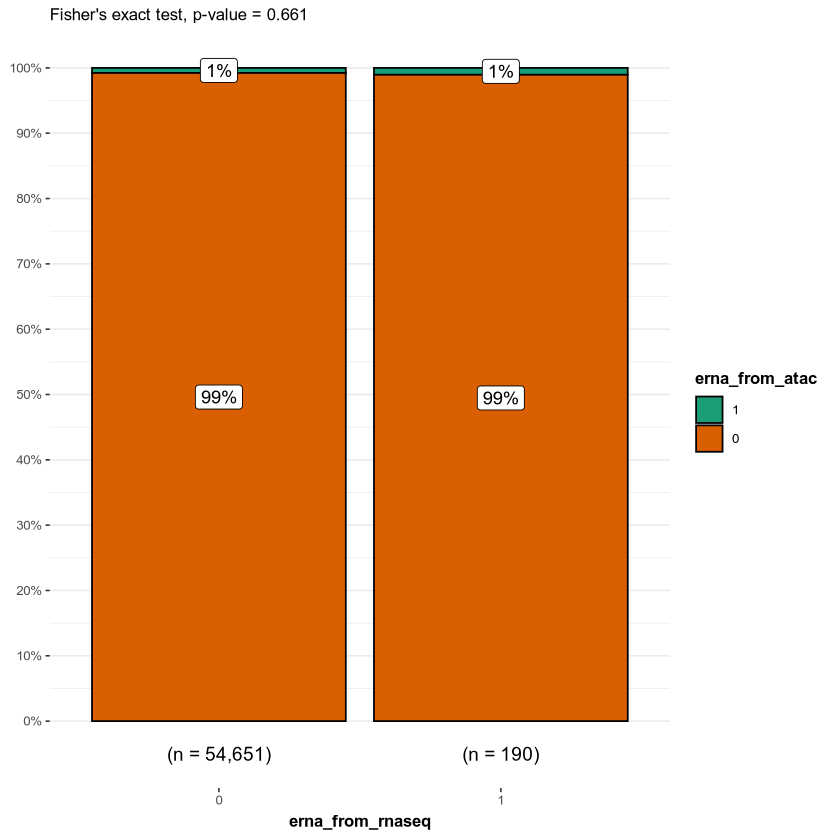

In [ ]:
test <- fisher.test(contingency_table)

# combine plot and statistical test with ggbarstats
library(ggstatsplot)
ggbarstats(
  contingency_df, 'erna_from_atac', 'erna_from_rnaseq',
  results.subtitle = FALSE,
  subtitle = paste0(
    "Fisher's exact test", ", p-value = ",
    ifelse(test$p.value < 0.001, "< 0.001", round(test$p.value, 3))
  )
)